## Initial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")


In [2]:
import pandas as pd
import matplotlib
import joblib
import xgboost
import sklearn

# List versions of specific libraries you imported
libraries = [pd, matplotlib, joblib, xgboost, sklearn]

for lib in libraries:
    print(f"{lib.__name__}: {lib.__version__}")


pandas: 2.2.0
matplotlib: 3.7.0
joblib: 1.2.0
xgboost: 1.7.6
sklearn: 1.5.1


In [3]:
try:
    # Try loading the file from your laptop path
    disease_df = pd.read_excel('C:/Users/Eugene/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/Patients Data ( Used for Heart Disease Prediction ).xlsx')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    disease_df = pd.read_excel('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/Patients Data ( Used for Heart Disease Prediction ).xlsx')

In [4]:
disease_df

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,Not at all (right now),0,Hispanic,0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,Not at all (right now),0,Hispanic,0,1,0,0,"Yes, received Tdap",0,0
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,Not at all (right now),1,Hispanic,0,1,1,1,"Yes, received Tdap",1,0
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,1


In [5]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [6]:
disease_df.describe()

,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,...,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000
mean,118815.500000,1.704990,83.667908,28.691602,0.055553,0.061512,0.041779,0.148517,0.085225,0.078281,...,0.148933,0.034524,0.067567,0.426941,0.545285,0.342697,0.531907,0.407125,0.042823,0.295939
std,68598.016571,0.106776,21.360982,6.528065,0.229056,0.240267,0.200085,0.355612,0.279217,0.268614,...,0.356023,0.182572,0.251002,0.494635,0.497946,0.474612,0.498982,0.491299,0.202458,0.456465
min,1.000000,0.910000,28.120001,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59408.250000,1.630000,68.040001,24.280001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,118815.500000,1.700000,81.650002,27.459999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,178222.750000,1.780000,95.250000,31.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,237630.000000,2.410000,292.570007,97.650002,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
disease_df.describe(include = object)

,State,Sex,GeneralHealth,AgeCategory,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,TetanusLast10Tdap
count,237630,237630,237630,237630,237630,237630,237630,237630,237630
unique,54,2,5,13,4,4,4,5,4
top,Washington,Female,Very good,Age 65 to 69,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic","No, did not receive any tetanus shot in the pa..."
freq,14241,123293,83520,27547,197463,142390,183446,179369,79370


## Preprocessing

In [8]:
# Define skin type mapping based on RaceEthnicityCategory
skin_type_map = {
    "White only, Non-Hispanic": "Type I-II",         # Light Skin
    "Hispanic": "Type III",                          # Medium Skin
    "Multiracial, Non-Hispanic": "Type III",         # Medium Skin
    "Black only, Non-Hispanic": "Type IV-VI",        # Darker Skin
    "Other race only, Non-Hispanic": "Type IV-VI"    # Darker Skin
}

# Define UV index categories based on general state exposure patterns
uv_map = {
    "Washington": "Moderate", "Maryland": "Moderate", "Minnesota": "Moderate", 
    "Ohio": "Moderate", "New York": "Moderate", "Texas": "Very High", "Florida": "Very High", 
    "Kansas": "High", "Wisconsin": "Moderate", "Maine": "Moderate", "Iowa": "Moderate", 
    "Indiana": "Moderate", "South Carolina": "High", "Virginia": "Moderate", 
    "Arizona": "Extreme", "Hawaii": "Very High", "Utah": "High", "Michigan": "Moderate", 
    "Massachusetts": "Moderate", "Nebraska": "High", "Colorado": "High", 
    "Georgia": "High", "California": "Very High", "Connecticut": "Moderate", 
    "Vermont": "Moderate", "South Dakota": "High", "Montana": "Moderate", 
    "Missouri": "High", "New Jersey": "Moderate", "New Hampshire": "Moderate", 
    "Puerto Rico": "Very High", "Idaho": "High", "Alaska": "Low", "Rhode Island": "Moderate", 
    "Louisiana": "High", "Oregon": "Moderate", "Oklahoma": "High", "West Virginia": "Moderate", 
    "New Mexico": "Very High", "Arkansas": "High", "Tennessee": "Moderate", 
    "Pennsylvania": "Moderate", "North Carolina": "High", "Illinois": "Moderate", 
    "North Dakota": "Moderate", "Mississippi": "High", "Kentucky": "Moderate", 
    "Wyoming": "High", "Delaware": "Moderate", "Alabama": "High", "Nevada": "Very High", 
    "District of Columbia": "Moderate", "Guam": "Very High", "Virgin Islands": "Very High"
}

# Dictionary mapping states to their average temperatures (°C)
state_temperature_map = {
    'Washington': 10.3, 'Maryland': 12.5, 'Minnesota': 7.0, 'Ohio': 11.0, 'New York': 9.0,
    'Texas': 21.5, 'Florida': 22.0, 'Kansas': 14.0, 'Wisconsin': 8.5, 'Maine': 6.5,
    'Iowa': 10.0, 'Indiana': 11.5, 'South Carolina': 16.5, 'Virginia': 14.0, 'Arizona': 18.0,
    'Hawaii': 23.5, 'Utah': 15.5, 'Michigan': 9.5, 'Massachusetts': 10.0, 'Nebraska': 10.0,
    'Colorado': 12.5, 'Georgia': 16.5, 'California': 18.0, 'Connecticut': 9.5, 'Vermont': 6.0,
    'South Dakota': 10.5, 'Montana': 6.5, 'Missouri': 11.0, 'New Jersey': 10.0, 'New Hampshire': 8.5,
    'Puerto Rico': 26.0, 'Idaho': 10.0, 'Alaska': 3.0, 'Rhode Island': 10.0, 'Louisiana': 18.5,
    'Oregon': 11.5, 'Oklahoma': 15.0, 'West Virginia': 12.0, 'New Mexico': 17.0, 'Arkansas': 15.0,
    'Tennessee': 14.0, 'Pennsylvania': 10.0, 'North Carolina': 15.5, 'Illinois': 9.5, 'North Dakota': 8.0,
    'Mississippi': 17.5, 'Kentucky': 12.0, 'Wyoming': 5.5, 'Delaware': 11.0, 'Alabama': 17.0,
    'Nevada': 20.0, 'District of Columbia': 12.5, 'Guam': 28.0, 'Virgin Islands': 29.0
}

In [9]:
disease_df['skin_type'] = disease_df['RaceEthnicityCategory'].map(skin_type_map)
disease_df['sunlight_exposure_category'] = disease_df['State'].map(uv_map)
disease_df['average_environment_temperature'] = disease_df['State'].map(state_temperature_map)

In [10]:
disease_df['skin_type'].unique()

array(['Type I-II', 'Type IV-VI', 'Type III'], dtype=object)

In [11]:
disease_df['sunlight_exposure_category'].unique()

array(['High', 'Low', 'Extreme', 'Very High', 'Moderate'], dtype=object)

In [12]:
disease_df = disease_df.drop(columns=['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap'])

In [14]:
disease_df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
disease_df['GeneralHealth'].unique()

array(['Fair', 'Very good', 'Excellent', 'Good', 'Poor'], dtype=object)

In [16]:
disease_df['AgeCategory'].unique()

array(['Age 75 to 79', 'Age 65 to 69', 'Age 60 to 64', 'Age 70 to 74',
       'Age 50 to 54', 'Age 80 or older', 'Age 55 to 59', 'Age 25 to 29',
       'Age 40 to 44', 'Age 30 to 34', 'Age 35 to 39', 'Age 18 to 24',
       'Age 45 to 49'], dtype=object)

In [17]:
disease_df['HadDiabetes'].unique()

array(['Yes', 'No', 'No, pre-diabetes or borderline diabetes',
       'Yes, but only during pregnancy (female)'], dtype=object)

In [18]:
disease_df['SmokerStatus'].unique()

array(['Former smoker', 'Never smoked',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

In [19]:
disease_df['ECigaretteUsage'].unique()

array(['Never used e-cigarettes in my entire life',
       'Not at all (right now)', 'Use them some days',
       'Use them every day'], dtype=object)

In [13]:
# Map GeneralHealth
general_health_mapping = {
    "Excellent": 5,
    "Very good": 4,
    "Good": 3,
    "Fair": 2,
    "Poor": 1
}
# Map AgeCategory
age_category_mapping = {
    "Age 18 to 24": 1,
    "Age 25 to 29": 2,
    "Age 30 to 34": 3,
    "Age 35 to 39": 4,
    "Age 40 to 44": 5,
    "Age 45 to 49": 6,
    "Age 50 to 54": 7,
    "Age 55 to 59": 8,
    "Age 60 to 64": 9,
    "Age 65 to 69": 10,
    "Age 70 to 74": 11,
    "Age 75 to 79": 12,
    "Age 80 or older": 13
}
# Map SmokerStatus
smoker_status_mapping = {
    "Never smoked": 0,
    "Former smoker": 1,
    "Current smoker - now smokes some days": 2,
    "Current smoker - now smokes every day": 3
}
# Map HadDiabetes
diabetes_mapping = {
    "No": 0,
    "Yes": 1,
    "No, pre-diabetes or borderline diabetes": 2,
    "Yes, but only during pregnancy (female)": 3
}
# Map ECigaretteUsage
e_cigarette_usage_mapping = {
    "Never used e-cigarettes in my entire life": 0,
    "Not at all (right now)": 1,
    "Use them some days": 2,
    "Use them every day": 3
}

# Map skin_type
skin_type_mapping = {
    'Type I-II' : 0, 
    'Type IV-VI': 1, 
    'Type III': 2
}
# Map sunlight_type
sunlight_exposure_type_mapping = {
    'High': 0, 
    'Low': 1, 
    'Extreme': 2, 
    'Very High': 3, 
    'Moderate': 4
}

In [14]:
disease_df["Sex"] = disease_df["Sex"].map({"Female": 0, "Male": 1})

In [15]:
disease_df["GeneralHealth"] = disease_df["GeneralHealth"].map(general_health_mapping)
disease_df["AgeCategory"] = disease_df["AgeCategory"].map(age_category_mapping)
disease_df["SmokerStatus"] = disease_df["SmokerStatus"].map(smoker_status_mapping)
disease_df["HadDiabetes"] = disease_df["HadDiabetes"].map(diabetes_mapping)
disease_df["ECigaretteUsage"] = disease_df["ECigaretteUsage"].map(e_cigarette_usage_mapping)
disease_df['skin_type'] = disease_df['skin_type'].map(skin_type_mapping)
disease_df['sunlight_exposure_category'] = disease_df['sunlight_exposure_category'].map(sunlight_exposure_type_mapping)

In [16]:
# Define parameter grids for both models
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

In [17]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   PatientID                        237630 non-null  int64  
 1   Sex                              237630 non-null  int64  
 2   GeneralHealth                    237630 non-null  int64  
 3   AgeCategory                      237630 non-null  int64  
 4   HeightInMeters                   237630 non-null  float64
 5   WeightInKilograms                237630 non-null  float64
 6   BMI                              237630 non-null  float64
 7   HadHeartAttack                   237630 non-null  int64  
 8   HadAngina                        237630 non-null  int64  
 9   HadStroke                        237630 non-null  int64  
 10  HadAsthma                        237630 non-null  int64  
 11  HadSkinCancer                    237630 non-null  int64  
 12  Ha

## Heart Attack

Affects the heart.

- Target: `HadHeartAttack`
- Variables:
    - `AgeCategory`
    - `Sex`
    - `HeightInMeters`
    - `WeightInKilograms`
    - `GeneralHealth`
    - `SmokerStatus`
    - `AlcoholDrinkers`
    - `ECigaretteUsage`
    - `HadStroke`
    - `HadCOPD`
    - `HadDiabetes`
    - `HadKidneyDisease`
    - `HadArthritis`
    - `HadAngina`
    - `PneumoVaxEver`
    - `ChestScan`

In [20]:
heart_attack_df =  disease_df[[
    'HadHeartAttack',       # Target variable
    'AgeCategory',          # Predictor variables
    'Sex',
    'HeightInMeters',
    'WeightInKilograms',
    'GeneralHealth',
    'SmokerStatus',
    'AlcoholDrinkers',
    'ECigaretteUsage',
    'HadStroke',
    'HadCOPD',
    'HadDiabetes',
    'HadKidneyDisease',
    'HadArthritis',
    'HadAngina',
    'PneumoVaxEver',
    'ChestScan'
]]

heart_attack_df

,HadHeartAttack,AgeCategory,Sex,HeightInMeters,WeightInKilograms,GeneralHealth,SmokerStatus,AlcoholDrinkers,ECigaretteUsage,HadStroke,HadCOPD,HadDiabetes,HadKidneyDisease,HadArthritis,HadAngina,PneumoVaxEver,ChestScan
0,0,12,0,1.63,84.820000,2,1,0,0,0,0,1,0,1,1,1,1
1,0,10,0,1.60,71.669998,4,1,0,0,0,0,0,0,1,0,1,0
2,0,9,1,1.78,71.209999,5,0,1,0,0,0,0,0,0,0,0,0
3,0,11,1,1.78,95.250000,4,1,0,0,0,0,1,0,1,0,1,0
4,0,7,0,1.68,78.019997,3,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,0,9,0,1.57,90.720001,3,0,0,1,0,0,1,1,0,0,0,0
237626,0,8,0,1.70,72.570000,3,1,0,1,0,0,0,0,1,1,0,0
237627,1,6,1,1.75,70.309998,2,3,0,1,0,0,0,0,1,1,1,1
237628,0,2,0,1.57,46.720001,4,0,0,0,0,0,0,0,0,0,0,0


In [21]:
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HadHeartAttack     237630 non-null  int64  
 1   AgeCategory        237630 non-null  int64  
 2   Sex                237630 non-null  int64  
 3   HeightInMeters     237630 non-null  float64
 4   WeightInKilograms  237630 non-null  float64
 5   GeneralHealth      237630 non-null  int64  
 6   SmokerStatus       237630 non-null  int64  
 7   AlcoholDrinkers    237630 non-null  int64  
 8   ECigaretteUsage    237630 non-null  int64  
 9   HadStroke          237630 non-null  int64  
 10  HadCOPD            237630 non-null  int64  
 11  HadDiabetes        237630 non-null  int64  
 12  HadKidneyDisease   237630 non-null  int64  
 13  HadArthritis       237630 non-null  int64  
 14  HadAngina          237630 non-null  int64  
 15  PneumoVaxEver      237630 non-null  int64  
 16  Ch

In [22]:
heart_attack_df['HadHeartAttack'].value_counts()

HadHeartAttack
0    224429
1     13201
Name: count, dtype: int64

In [23]:
# Separate the majority and minority classes
ha_majority_class = heart_attack_df[heart_attack_df['HadHeartAttack'] == 0]
ha_minority_class = heart_attack_df[heart_attack_df['HadHeartAttack'] == 1]

# Undersample the majority class
ha_majority_class_undersampled = ha_majority_class.sample(n=len(ha_minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
ha_undersampled_df = pd.concat([ha_majority_class_undersampled, ha_minority_class], axis=0)

# Shuffle the dataset
ha_undersampled_df = ha_undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after undersampling
print(ha_undersampled_df['HadHeartAttack'].value_counts())

HadHeartAttack
1    13201
0    13201
Name: count, dtype: int64


In [24]:
# Define features and target variable
x = ha_undersampled_df.drop("HadHeartAttack", axis=1)
y = ha_undersampled_df["HadHeartAttack"]

In [25]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Random Forest (Heart Attack)

In [26]:
# Initialize the RF models
rf_model = RandomForestClassifier(random_state=42)

In [27]:
# Set up GridSearchCV for RF model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [28]:
# Fit the grid search models
rf_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [29]:
# Get the best models
best_rf_model = rf_grid_search.best_estimator_

In [30]:
# Evaluate on test data
rf_preds = best_rf_model.predict(x_test)

In [31]:
# Evaluate the best Random Forest model
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, rf_preds))
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, rf_preds))

Best Random Forest Model Accuracy: 0.7966294262450293
Best Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2587
           1       0.81      0.78      0.80      2694

    accuracy                           0.80      5281
   macro avg       0.80      0.80      0.80      5281
weighted avg       0.80      0.80      0.80      5281



In [32]:
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


#### XGBoost (Heart Attack)

In [33]:
# Initialize the XGB models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [34]:
# Set up GridSearchCV for XGB model
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [35]:
# Fit the grid search models
xgb_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [36]:
# Get the best models
best_xgb_model = xgb_grid_search.best_estimator_

In [37]:
# Evaluate on test data
xgb_preds = best_xgb_model.predict(x_test)

In [38]:
# Evaluate the best XGBoost model
print("Best XGBoost Model Accuracy:", accuracy_score(y_test, xgb_preds))
print("Best XGBoost Model Classification Report:")
print(classification_report(y_test, xgb_preds))

Best XGBoost Model Accuracy: 0.7966294262450293
Best XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2587
           1       0.81      0.78      0.80      2694

    accuracy                           0.80      5281
   macro avg       0.80      0.80      0.80      5281
weighted avg       0.80      0.80      0.80      5281



In [39]:
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.7}


Random Forest AUC-ROC: 0.8860636487215933
XGBoost AUC-ROC: 0.8858786967789665


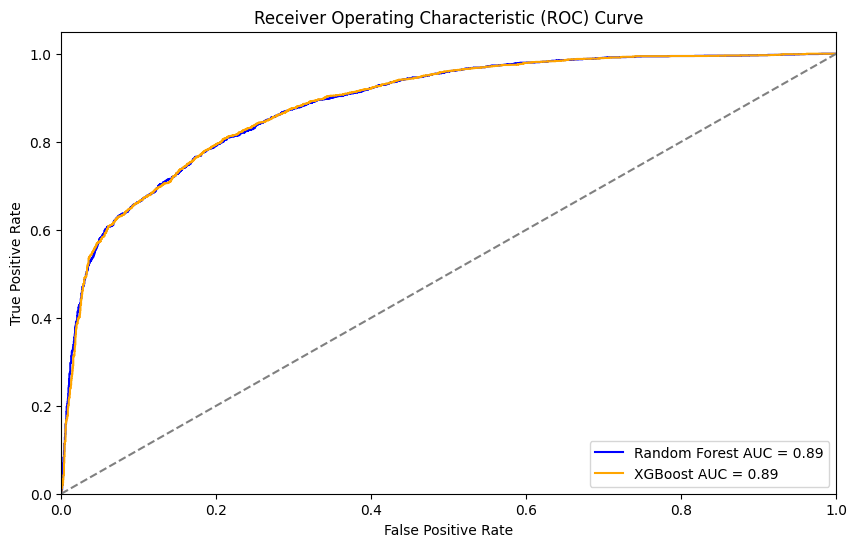

In [40]:
# For Random Forest
rf_probs = best_rf_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
rf_auc = roc_auc_score(y_test, rf_probs)  # AUC score
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)  # ROC curve data

# For XGBoost
xgb_probs = best_xgb_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
xgb_auc = roc_auc_score(y_test, xgb_probs)  # AUC score
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)  # ROC curve data

# Print AUC scores
print("Random Forest AUC-ROC:", rf_auc)
print("XGBoost AUC-ROC:", xgb_auc)

# Plotting the AUC-ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest AUC = {:.2f}'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='orange', label='XGBoost AUC = {:.2f}'.format(xgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Save Best Model (Heart Attack)

In [41]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def evaluate_and_export_best_model(rf_model, xgb_model, x_test, y_test):
    # Evaluate Random Forest model
    rf_preds = rf_model.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_preds)
    rf_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
    
    print("\nRandom Forest Model Evaluation:")
    print("Accuracy:", rf_accuracy)
    print("Classification Report:\n", classification_report(y_test, rf_preds))
    print("AUC-ROC:", rf_auc)
    
    # Evaluate XGBoost model
    xgb_preds = xgb_model.predict(x_test)
    xgb_accuracy = accuracy_score(y_test, xgb_preds)
    xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])

    print("\nXGBoost Model Evaluation:")
    print("Accuracy:", xgb_accuracy)
    print("Classification Report:\n", classification_report(y_test, xgb_preds))
    print("AUC-ROC:", xgb_auc)
    
    # Determine best model based on accuracy and AUC-ROC
    if (xgb_accuracy > rf_accuracy) or (xgb_auc > rf_auc):
        best_model = xgb_model
        model_name = 'XGBoost'
        file_name = 'disease_xgb_heart_attack.pkl'
    else:
        best_model = rf_model
        model_name = 'Random Forest'
        file_name = 'disease_rf_heart_attack.pkl'
    
    # Save the best model
    joblib.dump(best_model, file_name)
    print(f"\nBest model ({model_name}) saved as {file_name}.")

# Run the function with the evaluated models and test data
evaluate_and_export_best_model(best_rf_model, best_xgb_model, x_test, y_test)



Random Forest Model Evaluation:
Accuracy: 0.7966294262450293
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      2587
           1       0.81      0.78      0.80      2694

    accuracy                           0.80      5281
   macro avg       0.80      0.80      0.80      5281
weighted avg       0.80      0.80      0.80      5281

AUC-ROC: 0.8860636487215933

XGBoost Model Evaluation:
Accuracy: 0.7966294262450293
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      2587
           1       0.81      0.78      0.80      2694

    accuracy                           0.80      5281
   macro avg       0.80      0.80      0.80      5281
weighted avg       0.80      0.80      0.80      5281

AUC-ROC: 0.8858786967789665

Best model (Random Forest) saved as disease_rf_heart_attack.pkl.


## Angina

Chest pain due to reduced blood flow to the heart.

- Target: `HadAngina`
- Variables:
    - `AgeCategory`
    - `Sex`
    - `HeightInMeters`
    - `WeightInKilograms`
    - `GeneralHealth`
    - `SmokerStatus`
    - `AlcoholDrinkers`
    - `ECigaretteUsage`
    - `HadStroke`
    - `HadCOPD`
    - `HadDiabetes`
    - `HadKidneyDisease`
    - `HadArthritis`
    - `PneumoVaxEver`
    - `ChestScan`


In [19]:
angina_df =  disease_df[[
    'HadAngina',       # Target variable
    'AgeCategory',          # Predictor variables
    'Sex',
    'HeightInMeters',
    'WeightInKilograms',
    'GeneralHealth',
    'SmokerStatus',
    'AlcoholDrinkers',
    'ECigaretteUsage',
    'HadStroke',
    'HadCOPD',
    'HadDiabetes',
    'HadKidneyDisease',
    'HadArthritis',
    'HadHeartAttack',
    'PneumoVaxEver',
    'ChestScan'
]]

angina_df

,HadAngina,AgeCategory,Sex,HeightInMeters,WeightInKilograms,GeneralHealth,SmokerStatus,AlcoholDrinkers,ECigaretteUsage,HadStroke,HadCOPD,HadDiabetes,HadKidneyDisease,HadArthritis,HadHeartAttack,PneumoVaxEver,ChestScan
0,1,12,0,1.63,84.820000,2,1,0,0,0,0,1,0,1,0,1,1
1,0,10,0,1.60,71.669998,4,1,0,0,0,0,0,0,1,0,1,0
2,0,9,1,1.78,71.209999,5,0,1,0,0,0,0,0,0,0,0,0
3,0,11,1,1.78,95.250000,4,1,0,0,0,0,1,0,1,0,1,0
4,0,7,0,1.68,78.019997,3,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,0,9,0,1.57,90.720001,3,0,0,1,0,0,1,1,0,0,0,0
237626,1,8,0,1.70,72.570000,3,1,0,1,0,0,0,0,1,0,0,0
237627,1,6,1,1.75,70.309998,2,3,0,1,0,0,0,0,1,1,1,1
237628,0,2,0,1.57,46.720001,4,0,0,0,0,0,0,0,0,0,0,0


In [20]:
angina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HadAngina          237630 non-null  int64  
 1   AgeCategory        237630 non-null  int64  
 2   Sex                237630 non-null  int64  
 3   HeightInMeters     237630 non-null  float64
 4   WeightInKilograms  237630 non-null  float64
 5   GeneralHealth      237630 non-null  int64  
 6   SmokerStatus       237630 non-null  int64  
 7   AlcoholDrinkers    237630 non-null  int64  
 8   ECigaretteUsage    237630 non-null  int64  
 9   HadStroke          237630 non-null  int64  
 10  HadCOPD            237630 non-null  int64  
 11  HadDiabetes        237630 non-null  int64  
 12  HadKidneyDisease   237630 non-null  int64  
 13  HadArthritis       237630 non-null  int64  
 14  HadHeartAttack     237630 non-null  int64  
 15  PneumoVaxEver      237630 non-null  int64  
 16  Ch

In [21]:
angina_df['HadAngina'].value_counts()

HadAngina
0    223013
1     14617
Name: count, dtype: int64

In [22]:
# Separate the majority and minority classes
angina_majority_class = angina_df[angina_df['HadAngina'] == 0]
angina_minority_class = angina_df[angina_df['HadAngina'] == 1]

# Undersample the majority class
angina_majority_class_undersampled = angina_majority_class.sample(n=len(angina_minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
angina_undersampled_df = pd.concat([angina_majority_class_undersampled, angina_minority_class], axis=0)

# Shuffle the dataset
angina_undersampled_df = angina_undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after undersampling
print(angina_undersampled_df['HadAngina'].value_counts())

HadAngina
0    14617
1    14617
Name: count, dtype: int64


In [24]:
# Define features and target variable
x = angina_undersampled_df.drop("HadAngina", axis=1)
y = angina_undersampled_df["HadAngina"]

In [25]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Random Forest (Angina)

In [26]:
# Initialize the RF models
rf_model = RandomForestClassifier(random_state=42)

In [27]:
# Set up GridSearchCV for RF model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [28]:
# Fit the grid search models
rf_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [29]:
# Get the best models
best_rf_model = rf_grid_search.best_estimator_

In [30]:
# Evaluate on test data
rf_preds = best_rf_model.predict(x_test)

In [31]:
# Evaluate the best Random Forest model
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, rf_preds))
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, rf_preds))

Best Random Forest Model Accuracy: 0.8173422267829656
Best Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2938
           1       0.81      0.83      0.82      2909

    accuracy                           0.82      5847
   macro avg       0.82      0.82      0.82      5847
weighted avg       0.82      0.82      0.82      5847



In [32]:
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


#### XGBoost (Angina)

In [33]:
# Initialize the XGB models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [34]:
# Set up GridSearchCV for XGB model
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [35]:
# Fit the grid search models
xgb_grid_search.fit(x_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [36]:
# Get the best models
best_xgb_model = xgb_grid_search.best_estimator_

In [37]:
# Evaluate on test data
xgb_preds = best_xgb_model.predict(x_test)

In [38]:
# Evaluate the best XGBoost model
print("Best XGBoost Model Accuracy:", accuracy_score(y_test, xgb_preds))
print("Best XGBoost Model Classification Report:")
print(classification_report(y_test, xgb_preds))

Best XGBoost Model Accuracy: 0.8175132546605096
Best XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2938
           1       0.82      0.82      0.82      2909

    accuracy                           0.82      5847
   macro avg       0.82      0.82      0.82      5847
weighted avg       0.82      0.82      0.82      5847



In [39]:
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


Random Forest AUC-ROC: 0.8984425696080401
XGBoost AUC-ROC: 0.9006291593821292


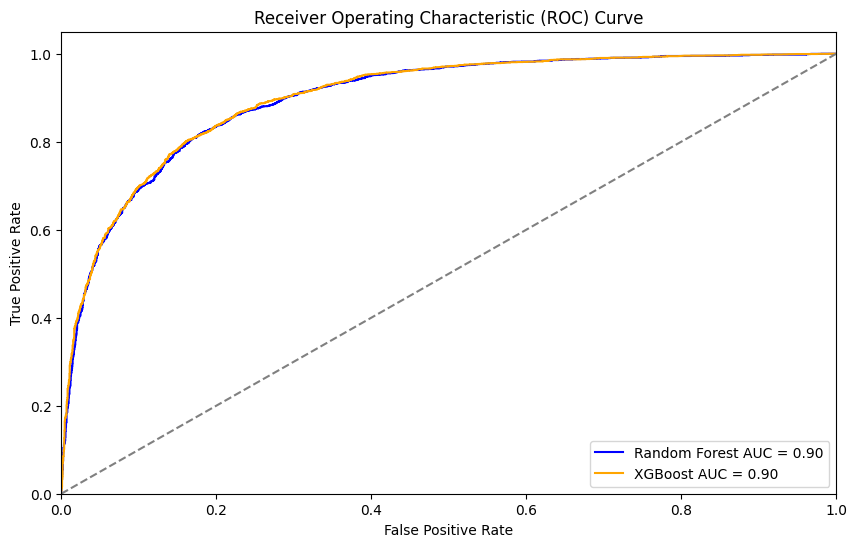

In [40]:
# For Random Forest
rf_probs = best_rf_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
rf_auc = roc_auc_score(y_test, rf_probs)  # AUC score
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)  # ROC curve data

# For XGBoost
xgb_probs = best_xgb_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
xgb_auc = roc_auc_score(y_test, xgb_probs)  # AUC score
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)  # ROC curve data

# Print AUC scores
print("Random Forest AUC-ROC:", rf_auc)
print("XGBoost AUC-ROC:", xgb_auc)

# Plotting the AUC-ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest AUC = {:.2f}'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='orange', label='XGBoost AUC = {:.2f}'.format(xgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Save Best Model (Angina)

In [41]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def evaluate_and_export_best_model(rf_model, xgb_model, x_test, y_test):
    # Evaluate Random Forest model
    rf_preds = rf_model.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_preds)
    rf_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
    
    print("\nRandom Forest Model Evaluation:")
    print("Accuracy:", rf_accuracy)
    print("Classification Report:\n", classification_report(y_test, rf_preds))
    print("AUC-ROC:", rf_auc)
    
    # Evaluate XGBoost model
    xgb_preds = xgb_model.predict(x_test)
    xgb_accuracy = accuracy_score(y_test, xgb_preds)
    xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])

    print("\nXGBoost Model Evaluation:")
    print("Accuracy:", xgb_accuracy)
    print("Classification Report:\n", classification_report(y_test, xgb_preds))
    print("AUC-ROC:", xgb_auc)
    
    # Determine best model based on accuracy and AUC-ROC
    if (xgb_accuracy > rf_accuracy) or (xgb_auc > rf_auc):
        best_model = xgb_model
        model_name = 'XGBoost'
        file_name = 'disease_xgb_angina.pkl'
    else:
        best_model = rf_model
        model_name = 'Random Forest'
        file_name = 'disease_rf_angina.pkl'
    
    # Save the best model
    joblib.dump(best_model, file_name)
    print(f"\nBest model ({model_name}) saved as {file_name}.")

# Run the function with the evaluated models and test data
evaluate_and_export_best_model(best_rf_model, best_xgb_model, x_test, y_test)



Random Forest Model Evaluation:
Accuracy: 0.8173422267829656
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      2938
           1       0.81      0.83      0.82      2909

    accuracy                           0.82      5847
   macro avg       0.82      0.82      0.82      5847
weighted avg       0.82      0.82      0.82      5847

AUC-ROC: 0.8984425696080401

XGBoost Model Evaluation:
Accuracy: 0.8175132546605096
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2938
           1       0.82      0.82      0.82      2909

    accuracy                           0.82      5847
   macro avg       0.82      0.82      0.82      5847
weighted avg       0.82      0.82      0.82      5847

AUC-ROC: 0.9006291593821292

Best model (XGBoost) saved as disease_xgb_angina.pkl.


## Stroke

Primarily affects the brain but is a result of cardiovascular complications. Although cardiovascular in origin, it directly impacts the brain and nervous system

- Target: `HadStroke`
- Variables:
    - `AgeCategory`
    - `Sex`
    - `HeightInMeters`
    - `WeightInKilograms`
    - `GeneralHealth`
    - `SmokerStatus`
    - `AlcoholDrinkers`
    - `ECigaretteUsage`
    - `HadHeartAttack`
    - `HadCOPD`
    - `HadDiabetes`
    - `HadKidneyDisease`
    - `HadArthritis`
    - `HadAngina`
    - `PneumoVaxEver`
    - `DifficultyWalking`

In [19]:
stroke_df =  disease_df[[
    'HadStroke',       # Target variable
    'AgeCategory',          # Predictor variables
    'Sex',
    'HeightInMeters',
    'WeightInKilograms',
    'GeneralHealth',
    'SmokerStatus',
    'AlcoholDrinkers',
    'ECigaretteUsage',
    'HadHeartAttack',
    'HadCOPD',
    'HadDiabetes',
    'HadKidneyDisease',
    'HadArthritis',
    'HadAngina',
    'PneumoVaxEver',
    'DifficultyWalking'
]]

stroke_df

,HadStroke,AgeCategory,Sex,HeightInMeters,WeightInKilograms,GeneralHealth,SmokerStatus,AlcoholDrinkers,ECigaretteUsage,HadHeartAttack,HadCOPD,HadDiabetes,HadKidneyDisease,HadArthritis,HadAngina,PneumoVaxEver,DifficultyWalking
0,0,12,0,1.63,84.820000,2,1,0,0,0,0,1,0,1,1,1,1
1,0,10,0,1.60,71.669998,4,1,0,0,0,0,0,0,1,0,1,0
2,0,9,1,1.78,71.209999,5,0,1,0,0,0,0,0,0,0,0,0
3,0,11,1,1.78,95.250000,4,1,0,0,0,0,1,0,1,0,1,0
4,0,7,0,1.68,78.019997,3,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,0,9,0,1.57,90.720001,3,0,0,1,0,0,1,1,0,0,0,0
237626,0,8,0,1.70,72.570000,3,1,0,1,0,0,0,0,1,1,0,0
237627,0,6,1,1.75,70.309998,2,3,0,1,1,0,0,0,1,1,1,1
237628,0,2,0,1.57,46.720001,4,0,0,0,0,0,0,0,0,0,0,0


In [20]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HadStroke          237630 non-null  int64  
 1   AgeCategory        237630 non-null  int64  
 2   Sex                237630 non-null  int64  
 3   HeightInMeters     237630 non-null  float64
 4   WeightInKilograms  237630 non-null  float64
 5   GeneralHealth      237630 non-null  int64  
 6   SmokerStatus       237630 non-null  int64  
 7   AlcoholDrinkers    237630 non-null  int64  
 8   ECigaretteUsage    237630 non-null  int64  
 9   HadHeartAttack     237630 non-null  int64  
 10  HadCOPD            237630 non-null  int64  
 11  HadDiabetes        237630 non-null  int64  
 12  HadKidneyDisease   237630 non-null  int64  
 13  HadArthritis       237630 non-null  int64  
 14  HadAngina          237630 non-null  int64  
 15  PneumoVaxEver      237630 non-null  int64  
 16  Di

In [21]:
stroke_df['HadStroke'].value_counts()

HadStroke
0    227702
1      9928
Name: count, dtype: int64

In [22]:
# Separate the majority and minority classes
stroke_majority_class = stroke_df[stroke_df['HadStroke'] == 0]
stroke_minority_class = stroke_df[stroke_df['HadStroke'] == 1]

# Undersample the majority class
stroke_majority_class_undersampled = stroke_majority_class.sample(n=len(stroke_minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
stroke_undersampled_df = pd.concat([stroke_majority_class_undersampled, stroke_minority_class], axis=0)

# Shuffle the dataset
stroke_undersampled_df = stroke_undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after undersampling
print(stroke_undersampled_df['HadStroke'].value_counts())

HadStroke
1    9928
0    9928
Name: count, dtype: int64


In [23]:
# Define features and target variable
x = stroke_undersampled_df.drop("HadStroke", axis=1)
y = stroke_undersampled_df["HadStroke"]

In [24]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Random Forest (Stroke)

In [25]:
# Initialize the RF models
rf_model = RandomForestClassifier(random_state=42)

In [26]:
# Set up GridSearchCV for RF model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [27]:
# Fit the grid search models
rf_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [28]:
# Get the best models
best_rf_model = rf_grid_search.best_estimator_

In [29]:
# Evaluate on test data
rf_preds = best_rf_model.predict(x_test)

In [30]:
# Evaluate the best Random Forest model
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, rf_preds))
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, rf_preds))

Best Random Forest Model Accuracy: 0.7313695871097684
Best Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1980
           1       0.72      0.76      0.74      1992

    accuracy                           0.73      3972
   macro avg       0.73      0.73      0.73      3972
weighted avg       0.73      0.73      0.73      3972



In [31]:
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


#### XGBoost (Stroke)

In [32]:
# Initialize the XGB models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [33]:
# Set up GridSearchCV for XGB model
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [34]:
# Fit the grid search models
xgb_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [35]:
# Get the best models
best_xgb_model = xgb_grid_search.best_estimator_

In [36]:
# Evaluate on test data
xgb_preds = best_xgb_model.predict(x_test)

In [37]:
# Evaluate the best XGBoost model
print("Best XGBoost Model Accuracy:", accuracy_score(y_test, xgb_preds))
print("Best XGBoost Model Classification Report:")
print(classification_report(y_test, xgb_preds))

Best XGBoost Model Accuracy: 0.7303625377643505
Best XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1980
           1       0.72      0.76      0.74      1992

    accuracy                           0.73      3972
   macro avg       0.73      0.73      0.73      3972
weighted avg       0.73      0.73      0.73      3972



In [38]:
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Random Forest AUC-ROC: 0.8094244401849822
XGBoost AUC-ROC: 0.8107769461685124


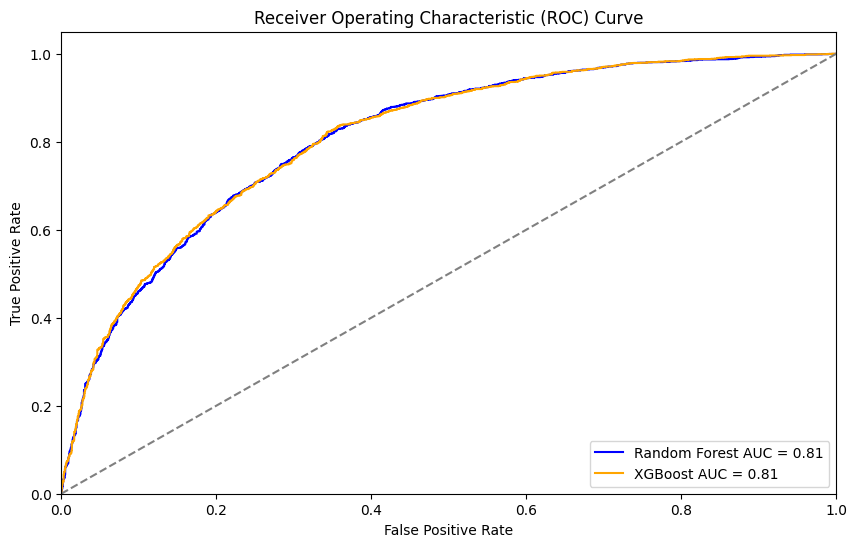

In [39]:
# For Random Forest
rf_probs = best_rf_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
rf_auc = roc_auc_score(y_test, rf_probs)  # AUC score
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)  # ROC curve data

# For XGBoost
xgb_probs = best_xgb_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
xgb_auc = roc_auc_score(y_test, xgb_probs)  # AUC score
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)  # ROC curve data

# Print AUC scores
print("Random Forest AUC-ROC:", rf_auc)
print("XGBoost AUC-ROC:", xgb_auc)

# Plotting the AUC-ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest AUC = {:.2f}'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='orange', label='XGBoost AUC = {:.2f}'.format(xgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Save Best Model (Stroke)

In [40]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def evaluate_and_export_best_model(rf_model, xgb_model, x_test, y_test):
    # Evaluate Random Forest model
    rf_preds = rf_model.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_preds)
    rf_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
    
    print("\nRandom Forest Model Evaluation:")
    print("Accuracy:", rf_accuracy)
    print("Classification Report:\n", classification_report(y_test, rf_preds))
    print("AUC-ROC:", rf_auc)
    
    # Evaluate XGBoost model
    xgb_preds = xgb_model.predict(x_test)
    xgb_accuracy = accuracy_score(y_test, xgb_preds)
    xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])

    print("\nXGBoost Model Evaluation:")
    print("Accuracy:", xgb_accuracy)
    print("Classification Report:\n", classification_report(y_test, xgb_preds))
    print("AUC-ROC:", xgb_auc)
    
    # Determine best model based on accuracy and AUC-ROC
    if (xgb_accuracy > rf_accuracy) or (xgb_auc > rf_auc):
        best_model = xgb_model
        model_name = 'XGBoost'
        file_name = 'disease_xgb_stroke.pkl'
    else:
        best_model = rf_model
        model_name = 'Random Forest'
        file_name = 'disease_rf_stroke.pkl'
    
    # Save the best model
    joblib.dump(best_model, file_name)
    print(f"\nBest model ({model_name}) saved as {file_name}.")

# Run the function with the evaluated models and test data
evaluate_and_export_best_model(best_rf_model, best_xgb_model, x_test, y_test)



Random Forest Model Evaluation:
Accuracy: 0.7313695871097684
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1980
           1       0.72      0.76      0.74      1992

    accuracy                           0.73      3972
   macro avg       0.73      0.73      0.73      3972
weighted avg       0.73      0.73      0.73      3972

AUC-ROC: 0.8094244401849822

XGBoost Model Evaluation:
Accuracy: 0.7303625377643505
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1980
           1       0.72      0.76      0.74      1992

    accuracy                           0.73      3972
   macro avg       0.73      0.73      0.73      3972
weighted avg       0.73      0.73      0.73      3972

AUC-ROC: 0.8107769461685124

Best model (XGBoost) saved as disease_xgb_stroke.pkl.


## Depressive Disorder

Impacts mental health and brain chemistry.

- Target: `HadDepressiveDisorder`
- Variables:
    - `AgeCategory`
    - `Sex`

    - `GeneralHealth`
    - `SmokerStatus`
    - `AlcoholDrinkers`
    - `ECigaretteUsage`
    
    - `HadHeartAttack`
    - `HadStroke`
    - `HadCOPD`
    
    - `HadAsthma`
    - `HadArthritis`
    - `DifficultyConcentrating`
    - `DifficultyErrands`
    - `DifficultyDressingBathing`
    - `BlindOrVisionDifficulty`
    - `DeafOrHardOfHearing`
    - `DifficultyWalking`

In [19]:
depresive_disorder_df =  disease_df[[
    'HadDepressiveDisorder',       # Target variable
    'AgeCategory',          # Predictor variables
    'Sex',
    'GeneralHealth',
    'SmokerStatus',
    'AlcoholDrinkers',
    'ECigaretteUsage',
    'HadHeartAttack',
    'HadStroke',
    'HadCOPD',
    'HadAsthma',
    'HadArthritis',
    'DifficultyConcentrating',
    'DifficultyErrands',
    'DifficultyDressingBathing',
    'BlindOrVisionDifficulty',
    'DeafOrHardOfHearing',
    'DifficultyWalking'
]]

depresive_disorder_df

,HadDepressiveDisorder,AgeCategory,Sex,GeneralHealth,SmokerStatus,AlcoholDrinkers,ECigaretteUsage,HadHeartAttack,HadStroke,HadCOPD,HadAsthma,HadArthritis,DifficultyConcentrating,DifficultyErrands,DifficultyDressingBathing,BlindOrVisionDifficulty,DeafOrHardOfHearing,DifficultyWalking
0,0,12,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,1
1,0,10,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,9,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,11,1,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,7,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,0,9,0,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
237626,1,8,0,3,1,0,1,0,0,0,0,1,0,0,0,0,0,0
237627,0,6,1,2,3,0,1,1,0,0,0,1,1,0,1,0,0,1
237628,0,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
depresive_disorder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   HadDepressiveDisorder      237630 non-null  int64
 1   AgeCategory                237630 non-null  int64
 2   Sex                        237630 non-null  int64
 3   GeneralHealth              237630 non-null  int64
 4   SmokerStatus               237630 non-null  int64
 5   AlcoholDrinkers            237630 non-null  int64
 6   ECigaretteUsage            237630 non-null  int64
 7   HadHeartAttack             237630 non-null  int64
 8   HadStroke                  237630 non-null  int64
 9   HadCOPD                    237630 non-null  int64
 10  HadAsthma                  237630 non-null  int64
 11  HadArthritis               237630 non-null  int64
 12  DifficultyConcentrating    237630 non-null  int64
 13  DifficultyErrands          237630 non-null  int64
 14  Diff

In [21]:
depresive_disorder_df['HadDepressiveDisorder'].value_counts()

HadDepressiveDisorder
0    188734
1     48896
Name: count, dtype: int64

In [22]:
# Separate the majority and minority classes
dd_majority_class = depresive_disorder_df[depresive_disorder_df['HadDepressiveDisorder'] == 0]
dd_minority_class = depresive_disorder_df[depresive_disorder_df['HadDepressiveDisorder'] == 1]

# Undersample the majority class
dd_majority_class_undersampled = dd_majority_class.sample(n=len(dd_minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
dd_undersampled_df = pd.concat([dd_majority_class_undersampled, dd_minority_class], axis=0)

# Shuffle the dataset
dd_undersampled_df = dd_undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after undersampling
print(dd_undersampled_df['HadDepressiveDisorder'].value_counts())

HadDepressiveDisorder
1    48896
0    48896
Name: count, dtype: int64


In [23]:
# Define features and target variable
x = dd_undersampled_df.drop("HadDepressiveDisorder", axis=1)
y = dd_undersampled_df["HadDepressiveDisorder"]

In [24]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Random Forest (Depressive Disorder)

In [25]:
# Initialize the RF models
rf_model = RandomForestClassifier(random_state=42)

In [26]:
# Set up GridSearchCV for RF model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [27]:
# Fit the grid search models
rf_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [28]:
# Get the best models
best_rf_model = rf_grid_search.best_estimator_

In [29]:
# Evaluate on test data
rf_preds = best_rf_model.predict(x_test)

In [30]:
# Evaluate the best Random Forest model
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, rf_preds))
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, rf_preds))

Best Random Forest Model Accuracy: 0.7004959353750192
Best Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      9780
           1       0.74      0.62      0.67      9779

    accuracy                           0.70     19559
   macro avg       0.71      0.70      0.70     19559
weighted avg       0.71      0.70      0.70     19559



In [31]:
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


#### XGBoost (Depressive Disorder)

In [32]:
# Initialize the XGB models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [33]:
# Set up GridSearchCV for XGB model
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [34]:
# Fit the grid search models
xgb_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [35]:
# Get the best models
best_xgb_model = xgb_grid_search.best_estimator_

In [36]:
# Evaluate on test data
xgb_preds = best_xgb_model.predict(x_test)

In [37]:
# Evaluate the best XGBoost model
print("Best XGBoost Model Accuracy:", accuracy_score(y_test, xgb_preds))
print("Best XGBoost Model Classification Report:")
print(classification_report(y_test, xgb_preds))

Best XGBoost Model Accuracy: 0.703921468377729
Best XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      9780
           1       0.73      0.65      0.69      9779

    accuracy                           0.70     19559
   macro avg       0.71      0.70      0.70     19559
weighted avg       0.71      0.70      0.70     19559



In [38]:
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


Random Forest AUC-ROC: 0.7722841619839349
XGBoost AUC-ROC: 0.7745368868768705


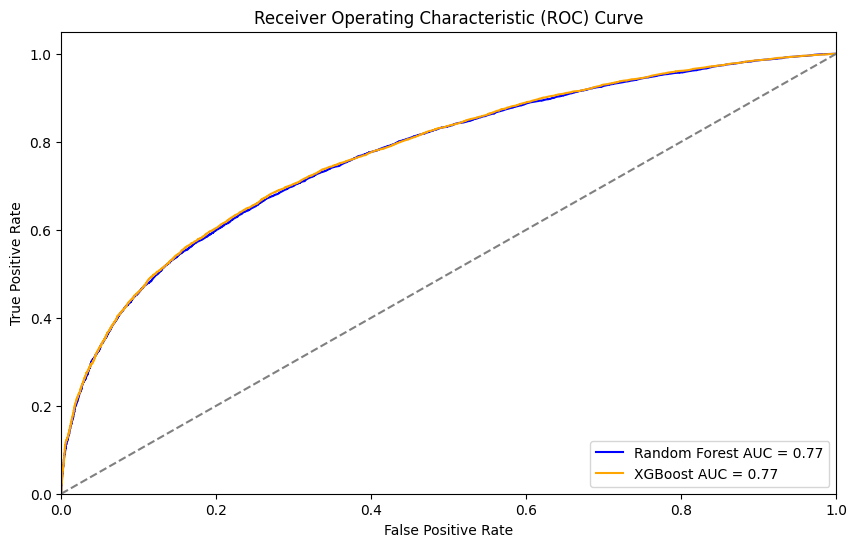

In [39]:
# For Random Forest
rf_probs = best_rf_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
rf_auc = roc_auc_score(y_test, rf_probs)  # AUC score
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)  # ROC curve data

# For XGBoost
xgb_probs = best_xgb_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
xgb_auc = roc_auc_score(y_test, xgb_probs)  # AUC score
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)  # ROC curve data

# Print AUC scores
print("Random Forest AUC-ROC:", rf_auc)
print("XGBoost AUC-ROC:", xgb_auc)

# Plotting the AUC-ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest AUC = {:.2f}'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='orange', label='XGBoost AUC = {:.2f}'.format(xgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Save Best Model (Depressive Disorder)

In [40]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def evaluate_and_export_best_model(rf_model, xgb_model, x_test, y_test):
    # Evaluate Random Forest model
    rf_preds = rf_model.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_preds)
    rf_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
    
    print("\nRandom Forest Model Evaluation:")
    print("Accuracy:", rf_accuracy)
    print("Classification Report:\n", classification_report(y_test, rf_preds))
    print("AUC-ROC:", rf_auc)
    
    # Evaluate XGBoost model
    xgb_preds = xgb_model.predict(x_test)
    xgb_accuracy = accuracy_score(y_test, xgb_preds)
    xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])

    print("\nXGBoost Model Evaluation:")
    print("Accuracy:", xgb_accuracy)
    print("Classification Report:\n", classification_report(y_test, xgb_preds))
    print("AUC-ROC:", xgb_auc)
    
    # Determine best model based on accuracy and AUC-ROC
    if (xgb_accuracy > rf_accuracy) or (xgb_auc > rf_auc):
        best_model = xgb_model
        model_name = 'XGBoost'
        file_name = 'disease_xgb_depressive_disorder.pkl'
    else:
        best_model = rf_model
        model_name = 'Random Forest'
        file_name = 'disease_rf_depressive_disorder.pkl'
    
    # Save the best model
    joblib.dump(best_model, file_name)
    print(f"\nBest model ({model_name}) saved as {file_name}.")

# Run the function with the evaluated models and test data
evaluate_and_export_best_model(best_rf_model, best_xgb_model, x_test, y_test)



Random Forest Model Evaluation:
Accuracy: 0.7004959353750192
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72      9780
           1       0.74      0.62      0.67      9779

    accuracy                           0.70     19559
   macro avg       0.71      0.70      0.70     19559
weighted avg       0.71      0.70      0.70     19559

AUC-ROC: 0.7722841619839349

XGBoost Model Evaluation:
Accuracy: 0.703921468377729
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      9780
           1       0.73      0.65      0.69      9779

    accuracy                           0.70     19559
   macro avg       0.71      0.70      0.70     19559
weighted avg       0.71      0.70      0.70     19559

AUC-ROC: 0.7745368868768705

Best model (XGBoost) saved as disease_xgb_depressive_disorder.pkl.


# Arthritis

- Target: `HadArthritis`
- Variables:
    - `AgeCategory`
    - `Sex`
    - `HeightInMeters`
    - `WeightInKilograms`
    - `GeneralHealth`

    - `SmokerStatus`
    - `AlcoholDrinkers`
    - `ECigaretteUsage`

    - `HadDiabetes`
    - `HadKidneyDisease`

    - `DifficultyDressingBathing`
    - `DifficultyErrands`
    - `DifficultyWalking`

In [19]:
arthritis_df =  disease_df[[
    'HadArthritis',       # Target variable
    'AgeCategory',          # Predictor variables
    'Sex',
    'HeightInMeters',
    'WeightInKilograms',
    'GeneralHealth',
    'SmokerStatus',
    'AlcoholDrinkers',
    'ECigaretteUsage',
    'HadDiabetes',
    'HadKidneyDisease',
    'DifficultyDressingBathing',
    'DifficultyErrands',
    'DifficultyWalking'
]]

arthritis_df

,HadArthritis,AgeCategory,Sex,HeightInMeters,WeightInKilograms,GeneralHealth,SmokerStatus,AlcoholDrinkers,ECigaretteUsage,HadDiabetes,HadKidneyDisease,DifficultyDressingBathing,DifficultyErrands,DifficultyWalking
0,1,12,0,1.63,84.820000,2,1,0,0,1,0,0,0,1
1,1,10,0,1.60,71.669998,4,1,0,0,0,0,0,0,0
2,0,9,1,1.78,71.209999,5,0,1,0,0,0,0,0,0
3,1,11,1,1.78,95.250000,4,1,0,0,1,0,0,0,0
4,0,7,0,1.68,78.019997,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,0,9,0,1.57,90.720001,3,0,0,1,1,1,0,0,0
237626,1,8,0,1.70,72.570000,3,1,0,1,0,0,0,0,0
237627,1,6,1,1.75,70.309998,2,3,0,1,0,0,1,0,1
237628,0,2,0,1.57,46.720001,4,0,0,0,0,0,0,0,0


In [20]:
arthritis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   HadArthritis               237630 non-null  int64  
 1   AgeCategory                237630 non-null  int64  
 2   Sex                        237630 non-null  int64  
 3   HeightInMeters             237630 non-null  float64
 4   WeightInKilograms          237630 non-null  float64
 5   GeneralHealth              237630 non-null  int64  
 6   SmokerStatus               237630 non-null  int64  
 7   AlcoholDrinkers            237630 non-null  int64  
 8   ECigaretteUsage            237630 non-null  int64  
 9   HadDiabetes                237630 non-null  int64  
 10  HadKidneyDisease           237630 non-null  int64  
 11  DifficultyDressingBathing  237630 non-null  int64  
 12  DifficultyErrands          237630 non-null  int64  
 13  DifficultyWalking          23

In [21]:
arthritis_df['HadArthritis'].value_counts()

HadArthritis
0    155281
1     82349
Name: count, dtype: int64

In [22]:
# Separate the majority and minority classes
arthritis_majority_class = arthritis_df[arthritis_df['HadArthritis'] == 0]
arthritis_minority_class = arthritis_df[arthritis_df['HadArthritis'] == 1]

# Undersample the majority class
arthritis_majority_class_undersampled = arthritis_majority_class.sample(n=len(arthritis_minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
arthritis_undersampled_df = pd.concat([arthritis_majority_class_undersampled, arthritis_minority_class], axis=0)

# Shuffle the dataset
arthritis_undersampled_df = arthritis_undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after undersampling
print(arthritis_undersampled_df['HadArthritis'].value_counts())

HadArthritis
0    82349
1    82349
Name: count, dtype: int64


In [23]:
# Define features and target variable
x = arthritis_undersampled_df.drop("HadArthritis", axis=1)
y = arthritis_undersampled_df["HadArthritis"]

In [24]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Random Forest (Arthritis)

In [25]:
# Initialize the RF models
rf_model = RandomForestClassifier(random_state=42)

In [26]:
# Set up GridSearchCV for RF model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [27]:
# Fit the grid search models
rf_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [28]:
# Get the best models
best_rf_model = rf_grid_search.best_estimator_

In [29]:
# Evaluate on test data
rf_preds = best_rf_model.predict(x_test)

In [30]:
# Evaluate the best Random Forest model
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, rf_preds))
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, rf_preds))

Best Random Forest Model Accuracy: 0.7163023679417122
Best Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70     16411
           1       0.70      0.76      0.73     16529

    accuracy                           0.72     32940
   macro avg       0.72      0.72      0.72     32940
weighted avg       0.72      0.72      0.72     32940



In [31]:
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


#### XGBoost (Arthritis)

In [32]:
# Initialize the XGB models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [33]:
# Set up GridSearchCV for XGB model
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [34]:
# Fit the grid search models
xgb_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [35]:
# Get the best models
best_xgb_model = xgb_grid_search.best_estimator_

In [36]:
# Evaluate on test data
xgb_preds = best_xgb_model.predict(x_test)

In [37]:
# Evaluate the best XGBoost model
print("Best XGBoost Model Accuracy:", accuracy_score(y_test, xgb_preds))
print("Best XGBoost Model Classification Report:")
print(classification_report(y_test, xgb_preds))

Best XGBoost Model Accuracy: 0.7192471159684275
Best XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70     16411
           1       0.70      0.77      0.73     16529

    accuracy                           0.72     32940
   macro avg       0.72      0.72      0.72     32940
weighted avg       0.72      0.72      0.72     32940



In [38]:
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


Random Forest AUC-ROC: 0.7946057947266688
XGBoost AUC-ROC: 0.7965055602774131


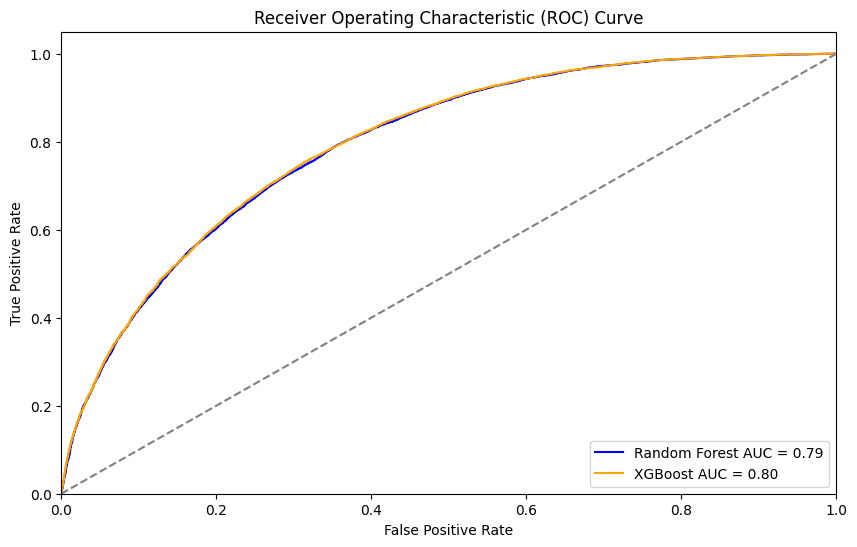

In [39]:
# For Random Forest
rf_probs = best_rf_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
rf_auc = roc_auc_score(y_test, rf_probs)  # AUC score
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)  # ROC curve data

# For XGBoost
xgb_probs = best_xgb_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
xgb_auc = roc_auc_score(y_test, xgb_probs)  # AUC score
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)  # ROC curve data

# Print AUC scores
print("Random Forest AUC-ROC:", rf_auc)
print("XGBoost AUC-ROC:", xgb_auc)

# Plotting the AUC-ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest AUC = {:.2f}'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='orange', label='XGBoost AUC = {:.2f}'.format(xgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Save Best Model (Arthritis)

In [40]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def evaluate_and_export_best_model(rf_model, xgb_model, x_test, y_test):
    # Evaluate Random Forest model
    rf_preds = rf_model.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_preds)
    rf_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
    
    print("\nRandom Forest Model Evaluation:")
    print("Accuracy:", rf_accuracy)
    print("Classification Report:\n", classification_report(y_test, rf_preds))
    print("AUC-ROC:", rf_auc)
    
    # Evaluate XGBoost model
    xgb_preds = xgb_model.predict(x_test)
    xgb_accuracy = accuracy_score(y_test, xgb_preds)
    xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])

    print("\nXGBoost Model Evaluation:")
    print("Accuracy:", xgb_accuracy)
    print("Classification Report:\n", classification_report(y_test, xgb_preds))
    print("AUC-ROC:", xgb_auc)
    
    # Determine best model based on accuracy and AUC-ROC
    if (xgb_accuracy > rf_accuracy) or (xgb_auc > rf_auc):
        best_model = xgb_model
        model_name = 'XGBoost'
        file_name = 'disease_xgb_arthritis.pkl'
    else:
        best_model = rf_model
        model_name = 'Random Forest'
        file_name = 'disease_rf_arthritis.pkl'
    
    # Save the best model
    joblib.dump(best_model, file_name)
    print(f"\nBest model ({model_name}) saved as {file_name}.")

# Run the function with the evaluated models and test data
evaluate_and_export_best_model(best_rf_model, best_xgb_model, x_test, y_test)



Random Forest Model Evaluation:
Accuracy: 0.7163023679417122
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70     16411
           1       0.70      0.76      0.73     16529

    accuracy                           0.72     32940
   macro avg       0.72      0.72      0.72     32940
weighted avg       0.72      0.72      0.72     32940

AUC-ROC: 0.7946057947266688

XGBoost Model Evaluation:
Accuracy: 0.7192471159684275
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70     16411
           1       0.70      0.77      0.73     16529

    accuracy                           0.72     32940
   macro avg       0.72      0.72      0.72     32940
weighted avg       0.72      0.72      0.72     32940

AUC-ROC: 0.7965055602774131

Best model (XGBoost) saved as disease_xgb_arthritis.pkl.


# Skin Cancer

Primarily affects the skin, with potential to spread to other parts of the body.

- Target: `HadSkinCancer`
- Variables:
    - `AgeCategory`
    - `Sex`
    - `skin_type`
    - `HeightInMeters`
    - `WeightInKilograms`
    - `GeneralHealth`
    - `SmokerStatus`
    - `AlcoholDrinkers`
    - `ECigaretteUsage`
    - `HadCOPD`
    - `DifficultyErrands`
    - `DifficultyDressingBathing`
    - `sunlight_exposure_category`
    - `average_environment_temperature`

In [18]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   PatientID                        237630 non-null  int64  
 1   Sex                              237630 non-null  int64  
 2   GeneralHealth                    237630 non-null  int64  
 3   AgeCategory                      237630 non-null  int64  
 4   HeightInMeters                   237630 non-null  float64
 5   WeightInKilograms                237630 non-null  float64
 6   BMI                              237630 non-null  float64
 7   HadHeartAttack                   237630 non-null  int64  
 8   HadAngina                        237630 non-null  int64  
 9   HadStroke                        237630 non-null  int64  
 10  HadAsthma                        237630 non-null  int64  
 11  HadSkinCancer                    237630 non-null  int64  
 12  Ha

In [19]:
skin_cancer_df =  disease_df[[
    'HadSkinCancer',       # Target variable
    'AgeCategory',          # Predictor variables
    'Sex',
    'skin_type',
    'HeightInMeters',
    'WeightInKilograms',
    'GeneralHealth',
    'SmokerStatus',
    'AlcoholDrinkers',
    'ECigaretteUsage',
    'HadCOPD',
    'DifficultyErrands',
    'DifficultyDressingBathing',
    'sunlight_exposure_category',
    'average_environment_temperature'
]]

skin_cancer_df

,HadSkinCancer,AgeCategory,Sex,skin_type,HeightInMeters,WeightInKilograms,GeneralHealth,SmokerStatus,AlcoholDrinkers,ECigaretteUsage,HadCOPD,DifficultyErrands,DifficultyDressingBathing,sunlight_exposure_category,average_environment_temperature
0,1,12,0,0,1.63,84.820000,2,1,0,0,0,0,0,0,17.0
1,0,10,0,0,1.60,71.669998,4,1,0,0,0,0,0,0,17.0
2,0,9,1,0,1.78,71.209999,5,0,1,0,0,0,0,0,17.0
3,0,11,1,0,1.78,95.250000,4,1,0,0,0,0,0,0,17.0
4,0,7,0,1,1.68,78.019997,3,0,0,0,0,0,0,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,0,9,0,2,1.57,90.720001,3,0,0,1,0,0,0,3,26.0
237626,0,8,0,2,1.70,72.570000,3,1,0,1,0,0,0,3,26.0
237627,0,6,1,2,1.75,70.309998,2,3,0,1,0,0,1,3,26.0
237628,0,2,0,2,1.57,46.720001,4,0,0,0,0,0,0,3,26.0


In [20]:
skin_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   HadSkinCancer                    237630 non-null  int64  
 1   AgeCategory                      237630 non-null  int64  
 2   Sex                              237630 non-null  int64  
 3   skin_type                        237630 non-null  int64  
 4   HeightInMeters                   237630 non-null  float64
 5   WeightInKilograms                237630 non-null  float64
 6   GeneralHealth                    237630 non-null  int64  
 7   SmokerStatus                     237630 non-null  int64  
 8   AlcoholDrinkers                  237630 non-null  int64  
 9   ECigaretteUsage                  237630 non-null  int64  
 10  HadCOPD                          237630 non-null  int64  
 11  DifficultyErrands                237630 non-null  int64  
 12  Di

In [21]:
skin_cancer_df['HadSkinCancer'].value_counts()

HadSkinCancer
0    217378
1     20252
Name: count, dtype: int64

In [22]:
# Separate the majority and minority classes
sc_majority_class = skin_cancer_df[skin_cancer_df['HadSkinCancer'] == 0]
sc_minority_class = skin_cancer_df[skin_cancer_df['HadSkinCancer'] == 1]

# Undersample the majority class
sc_majority_class_undersampled = sc_majority_class.sample(n=len(sc_minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
sc_undersampled_df = pd.concat([sc_majority_class_undersampled, sc_minority_class], axis=0)

# Shuffle the dataset
sc_undersampled_df = sc_undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after undersampling
print(sc_undersampled_df['HadSkinCancer'].value_counts())

HadSkinCancer
0    20252
1    20252
Name: count, dtype: int64


In [23]:
# Define features and target variable
x = sc_undersampled_df.drop("HadSkinCancer", axis=1)
y = sc_undersampled_df["HadSkinCancer"]

In [24]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Random Forest (Skin Cancer)

In [25]:
# Initialize the RF models
rf_model = RandomForestClassifier(random_state=42)

In [26]:
# Set up GridSearchCV for RF model
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [27]:
# Fit the grid search models
rf_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [28]:
# Get the best models
best_rf_model = rf_grid_search.best_estimator_

In [29]:
# Evaluate on test data
rf_preds = best_rf_model.predict(x_test)

In [30]:
# Evaluate the best Random Forest model
print("Best Random Forest Model Accuracy:", accuracy_score(y_test, rf_preds))
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, rf_preds))

Best Random Forest Model Accuracy: 0.7201580051845451
Best Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      4124
           1       0.67      0.86      0.75      3977

    accuracy                           0.72      8101
   macro avg       0.74      0.72      0.72      8101
weighted avg       0.74      0.72      0.72      8101



In [31]:
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


#### XGBoost (Skin Cancer)

In [32]:
# Initialize the XGB models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [33]:
# Set up GridSearchCV for XGB model
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [34]:
# Fit the grid search models
xgb_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [35]:
# Get the best models
best_xgb_model = xgb_grid_search.best_estimator_

In [36]:
# Evaluate on test data
xgb_preds = best_xgb_model.predict(x_test)

In [37]:
# Evaluate the best XGBoost model
print("Best XGBoost Model Accuracy:", accuracy_score(y_test, xgb_preds))
print("Best XGBoost Model Classification Report:")
print(classification_report(y_test, xgb_preds))

Best XGBoost Model Accuracy: 0.7217627453400814
Best XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69      4124
           1       0.68      0.83      0.75      3977

    accuracy                           0.72      8101
   macro avg       0.73      0.72      0.72      8101
weighted avg       0.74      0.72      0.72      8101



In [38]:
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Random Forest AUC-ROC: 0.7910663936451278
XGBoost AUC-ROC: 0.7930140012150367


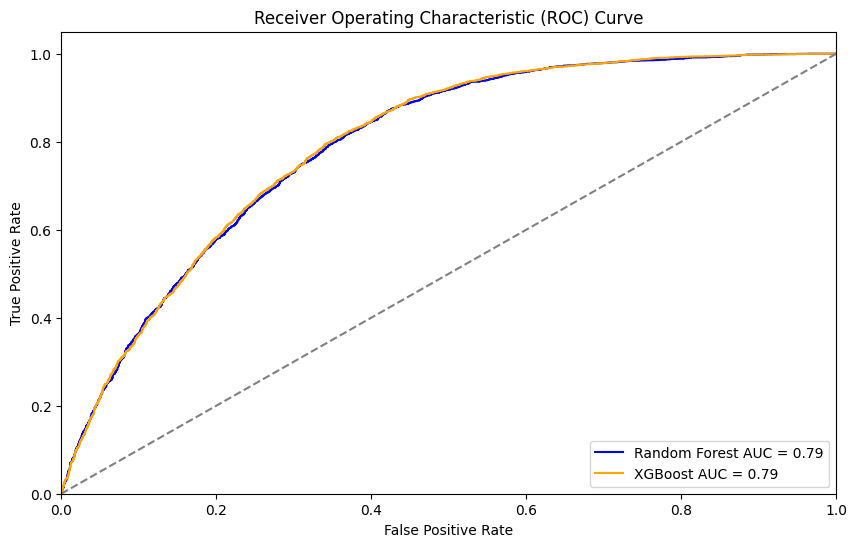

In [39]:
# For Random Forest
rf_probs = best_rf_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
rf_auc = roc_auc_score(y_test, rf_probs)  # AUC score
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)  # ROC curve data

# For XGBoost
xgb_probs = best_xgb_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
xgb_auc = roc_auc_score(y_test, xgb_probs)  # AUC score
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)  # ROC curve data

# Print AUC scores
print("Random Forest AUC-ROC:", rf_auc)
print("XGBoost AUC-ROC:", xgb_auc)

# Plotting the AUC-ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest AUC = {:.2f}'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='orange', label='XGBoost AUC = {:.2f}'.format(xgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Save Best Model (Skin Cancer)

In [40]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def evaluate_and_export_best_model(rf_model, xgb_model, x_test, y_test):
    # Evaluate Random Forest model
    rf_preds = rf_model.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_preds)
    rf_auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
    
    print("\nRandom Forest Model Evaluation:")
    print("Accuracy:", rf_accuracy)
    print("Classification Report:\n", classification_report(y_test, rf_preds))
    print("AUC-ROC:", rf_auc)
    
    # Evaluate XGBoost model
    xgb_preds = xgb_model.predict(x_test)
    xgb_accuracy = accuracy_score(y_test, xgb_preds)
    xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])

    print("\nXGBoost Model Evaluation:")
    print("Accuracy:", xgb_accuracy)
    print("Classification Report:\n", classification_report(y_test, xgb_preds))
    print("AUC-ROC:", xgb_auc)
    
    # Determine best model based on accuracy and AUC-ROC
    if (xgb_accuracy > rf_accuracy) or (xgb_auc > rf_auc):
        best_model = xgb_model
        model_name = 'XGBoost'
        file_name = 'disease_xgb_skin_cancer.pkl'
    else:
        best_model = rf_model
        model_name = 'Random Forest'
        file_name = 'disease_rf_skin_cancer.pkl'
    
    # Save the best model
    joblib.dump(best_model, file_name)
    print(f"\nBest model ({model_name}) saved as {file_name}.")

# Run the function with the evaluated models and test data
evaluate_and_export_best_model(best_rf_model, best_xgb_model, x_test, y_test)



Random Forest Model Evaluation:
Accuracy: 0.7201580051845451
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.59      0.68      4124
           1       0.67      0.86      0.75      3977

    accuracy                           0.72      8101
   macro avg       0.74      0.72      0.72      8101
weighted avg       0.74      0.72      0.72      8101

AUC-ROC: 0.7910663936451278

XGBoost Model Evaluation:
Accuracy: 0.7217627453400814
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69      4124
           1       0.68      0.83      0.75      3977

    accuracy                           0.72      8101
   macro avg       0.73      0.72      0.72      8101
weighted avg       0.74      0.72      0.72      8101

AUC-ROC: 0.7930140012150367

Best model (XGBoost) saved as disease_xgb_skin_cancer.pkl.
